In [96]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import poisson
import math 
import numpy as np 

destinos = ["Volcán Cotopaxi","El Panecillo","Parque Nacional El Cajas","Ilaló","Volcán Chimborazo","Catedral Metropolitana"]
pesos_d = [0.3,0.5,0.7,0.2,0.4,0.6]
aforo=40
numbuses=5
dia = 0
capacidad = 0
horaAnt = 0

ventas_dia={}
sinticket_dia={}
visitados={}
origen={}

uso_buses1={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
uso_buses2={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
uso_buses3={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
uso_buses4={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
uso_buses5={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}


busesid = [5,4,3,2,1]

class Turismo(object):
    
    def __init__(self, environment, numbuses):
        self.env=environment
        self.buses = simpy.Resource(environment, numbuses)


    

    def deviaje(self):

        tiempo = abs(math.ceil(np.random.normal(6, 4, 1)))*2
        print ("A empezado el viaje, tardara " + str(tiempo) + " horas")
        yield env.timeout(tiempo*60)
        print ("Bus a regresado")

        
        
        
        


    

    
    
        



def generar_Persona():
    nombres = ["Carlos","Juan","Jose","Maria","Estefania","Graciela"]
    num = random.randint(0,5) #Rand normal
    genero = stats.bernoulli(0.5) #Generado con Bernouli
    genero=genero.rvs(1)
    if genero:
        genero = "Hombre"
    else:
        genero = "Mujer"
    edad = poisson.rvs(18,50, 1) #Generado con Posion
    return str(nombres[num]) + " " + str(genero) + " de " + str (edad) + "años" 


def compra_boletos (env, nombre,tur, destinos , pesos_d):
    global dia
    global capacidad
    global horaAnt
    tickes = random.randint(1,6)


    if dia in ventas_dia:
        ventas_dia[dia]=ventas_dia[dia]+tickes
    else:
        ventas_dia[dia]=tickes
            



    tiempo = abs(math.ceil(np.random.normal(10, 2, 1)))


    
    capacidad =capacidad+tickes

    yield env.timeout(tiempo)
    print('%s a la hora %.2f espero %s Minutos y compro %s Tikets ' % (nombre, env.now,tiempo,tickes))

    hora =    math.ceil(env.now/60) - (24*(dia)) 
    print("hora:" +str(hora))
    print("Capacidad: " +str(capacidad))
    

    salida = random.choices(destinos, pesos_d, k=1)
    destino = random.choices(destinos, pesos_d, k=1)

    salida = salida[0]
    destino = destino[0]
    
    if hora != horaAnt :
        horaAnt = hora
        

        with tur.buses.request() as bus:
            
            yield bus
            numActual=busesid.pop()
            print("Sale bus "+str(numActual)+ " en el dia "+ str(dia) + " desde " +str(salida)+ " hacia " + str(destino))


            if destino in visitados:
                visitados[destino]=visitados[destino]+1
            else:
                visitados[destino]=1

            if salida in origen:
                origen[salida]=origen[salida]+1
            else:
                origen[salida]=1


            if dia in sinticket_dia:
                perd = (capacidad-40)
                if perd > 0: 
                    sinticket_dia[dia]=sinticket_dia[dia]+perd
                    capacidad = 0
            else:
                perd = (capacidad-40)
                if perd > 0: 
                    sinticket_dia[dia]=(capacidad-40)
                    capacidad = 0


            if numActual == 1:
                uso_buses1[dia]=uso_buses1[dia]+1

            elif numActual == 2:

                uso_buses2[dia]=uso_buses2[dia]+1

            elif numActual == 3:

                uso_buses3[dia]=uso_buses3[dia]+1

            elif numActual == 4:

                uso_buses4[dia]=uso_buses4[dia]+1

            elif numActual == 5:

                uso_buses5[dia]=uso_buses5[dia]+1





            yield env.process(tur.deviaje())
            busesid.append(numActual)



            print("Regreso el bus "+str(numActual))
            






def ejecutar_simulacion(env,numbuses, destinos , pesos_d):
    tur=Turismo(env, numbuses)
    global dia
    
    

    while True:                  
        
        dia = math.floor(env.now/1440) 
        yield env.timeout(random.randint(1, 50))
        
        persona = generar_Persona()

        env.process(compra_boletos(env,persona,tur, destinos , pesos_d))

        


        




print('Turismo UPS - Floro')
# Inicializamos la semilla aleatoria

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env,numbuses, destinos , pesos_d))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = 10080) # 7 Dias   # 1440 1 dia




Turismo UPS - Floro
Juan Mujer de [66]años a la hora 16.00 espero 7 Minutos y compro 5 Tikets 
hora:1
Capacidad: 5
Sale bus 1 en el dia 0 desde Parque Nacional El Cajas hacia Parque Nacional El Cajas
A empezado el viaje, tardara 4 horas
Graciela Mujer de [67]años a la hora 44.00 espero 10 Minutos y compro 5 Tikets 
hora:1
Capacidad: 10
Maria Hombre de [71]años a la hora 88.00 espero 11 Minutos y compro 5 Tikets 
hora:2
Capacidad: 15
Sale bus 2 en el dia 0 desde Parque Nacional El Cajas hacia Parque Nacional El Cajas
A empezado el viaje, tardara 4 horas
Graciela Hombre de [69]años a la hora 118.00 espero 10 Minutos y compro 4 Tikets 
hora:2
Capacidad: 19
Jose Mujer de [68]años a la hora 145.00 espero 10 Minutos y compro 6 Tikets 
hora:3
Capacidad: 25
Sale bus 3 en el dia 0 desde Volcán Chimborazo hacia Volcán Chimborazo
A empezado el viaje, tardara 16 horas
Juan Mujer de [67]años a la hora 162.00 espero 8 Minutos y compro 3 Tikets 
hora:3
Capacidad: 28
Juan Hombre de [78]años a la hora 

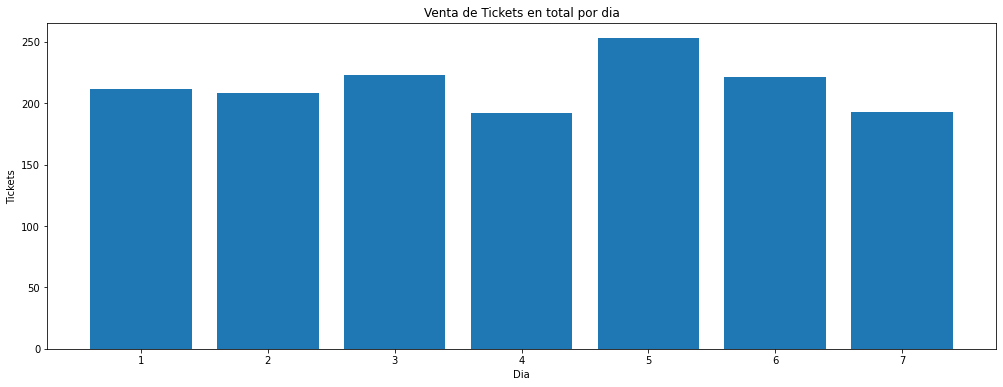

In [97]:
#Venta de tickets al dia 

etiquetao = list(ventas_dia.keys())
etiqueta = [x+1 for x in etiquetao]
valores = list(ventas_dia.values())
plt.figure(figsize=(17,6), )
plt.bar(range(len(ventas_dia)), valores, align="center", tick_label=etiqueta)
plt.title("Venta de Tickets en total por dia")
plt.xlabel("Dia")
plt.ylabel("Tickets")
plt.show()


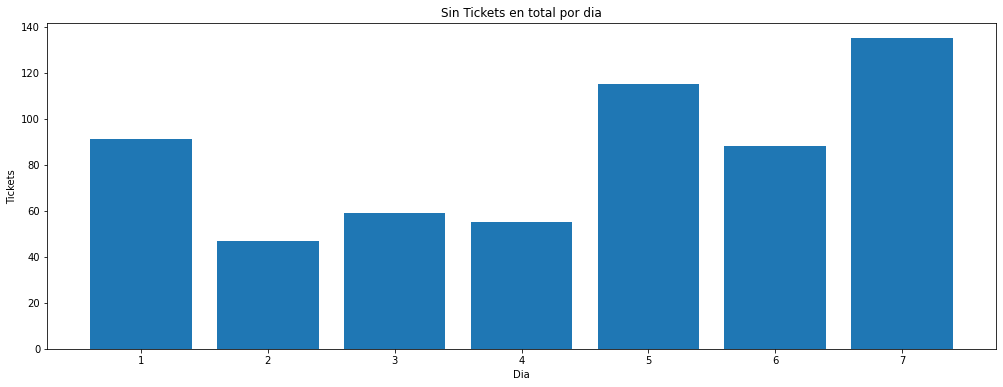

In [98]:
#Sin tickets al dia 

etiquetao = list(sinticket_dia.keys())
etiqueta = [x+1 for x in etiquetao]
valores = list(sinticket_dia.values())
plt.figure(figsize=(17,6), )
plt.bar(range(len(sinticket_dia)), valores, align="center", tick_label=etiqueta)
plt.title("Sin Tickets en total por dia")
plt.xlabel("Dia")
plt.ylabel("Tickets")
plt.show()

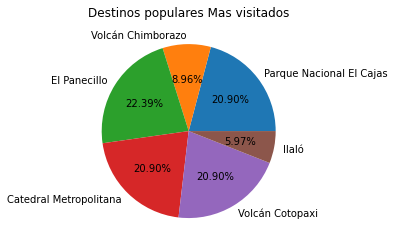

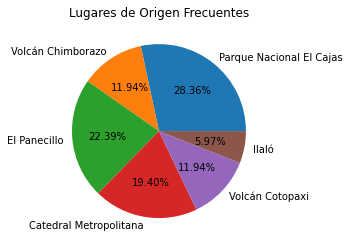

In [99]:
nombres = list(visitados.keys())
numeros = list(visitados.values())
titulo="Destinos populares Mas visitados"
plt.title(titulo)
plt.pie(numeros, labels=nombres,autopct='%1.2f%%')
plt.show()



nombres = list(origen.keys())
numeros = list(origen.values())
titulo="Lugares de Origen Frecuentes"
plt.title(titulo)
plt.pie(numeros, labels=nombres,autopct='%1.2f%%')
plt.show()



{0: 2, 1: 1, 2: 3, 3: 4, 4: 1, 5: 0, 6: 2}
{0: 2, 1: 3, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1}
{0: 2, 1: 5, 2: 1, 3: 2, 4: 1, 5: 2, 6: 1}
{0: 2, 1: 1, 2: 3, 3: 1, 4: 2, 5: 1, 6: 2}
{0: 1, 1: 4, 2: 2, 3: 1, 4: 1, 5: 2, 6: 5}


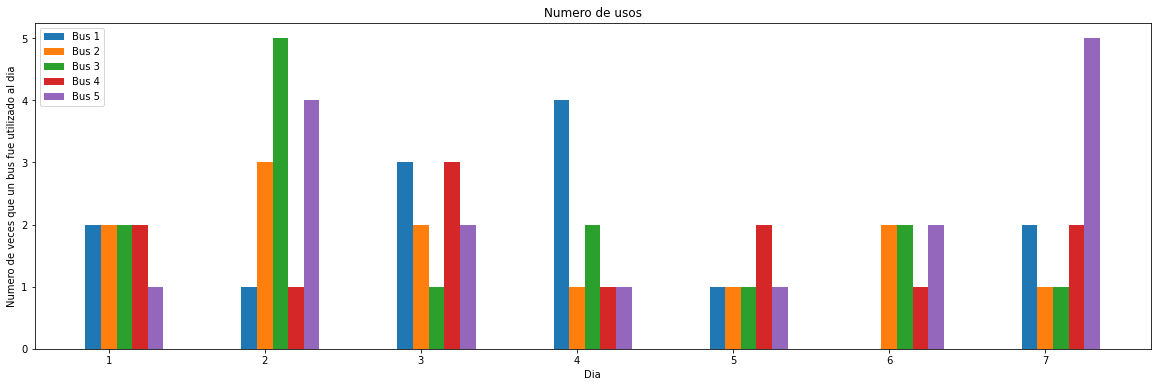

In [105]:


print(uso_buses1)
print(uso_buses2)
print(uso_buses3)
print(uso_buses4)
print(uso_buses5)

valores1 = list(uso_buses1.values())
valores2 = list(uso_buses2.values())
valores3 = list(uso_buses3.values())
valores4 = list(uso_buses4.values())
valores5 = list(uso_buses5.values())



numero_de_grupos = len(uso_buses1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.1
 
plt.figure(figsize=(20,6), )
plt.bar(indice_barras, valores1, width=ancho_barras, label='Bus 1')
plt.bar(indice_barras + (ancho_barras), valores2, width=ancho_barras, label='Bus 2')
plt.bar(indice_barras + (ancho_barras*2), valores3, width=ancho_barras, label='Bus 3')
plt.bar(indice_barras + (ancho_barras*3), valores4, width=ancho_barras, label='Bus 4')
plt.bar(indice_barras + (ancho_barras*4), valores5, width=ancho_barras, label='Bus 5')

plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, (etiqueta))
 
plt.ylabel('Numero de veces que un bus fue utilizado al dia')
plt.xlabel('Dia')
plt.title('Numero de usos')
 
plt.show()